# ML: Single Linear Regression


### Imports


In [1]:
#!/usr/bin/env python3

"""
    Title:  ML Workshop: Multiple Linear Regression (MLR)
    Date:   May 15, 2021
    Author: Mario Raciti
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Create a dataset


In [2]:
np.random.seed(0)

# Create a dataset
# Vars
obs_n = 200
b0, b1, b2, b3 = 5, 8, -5, 0.1
fluctuations = 1

# Features
X1 = 1 + 2 * np.random.random(size=(obs_n, 1))  # in (1, 3)
X2 = 2 * np.random.random(size=(obs_n, 1))      # in (0, 2)
X3 = 4 + 3 * np.random.random(size=(obs_n, 1))  # in (4, 7)
X = np.concatenate((X1, X2, X3), axis=1)    # Gather features

# Targets
Y = b0 + b1 * X1.squeeze() + b2 * X2.squeeze() + b3 * X3.squeeze() + \
    fluctuations * np.random.randn(obs_n)

### Plots


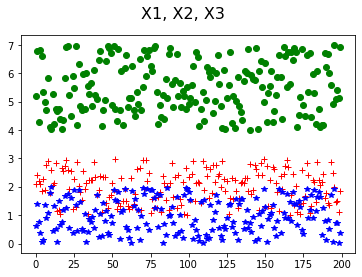

In [3]:
# Plot features to chart
plt.plot(X1.squeeze(), "r+")
plt.plot(X2.squeeze(), "b*")
plt.plot(X3.squeeze(), "go")
plt.suptitle('X1, X2, X3', fontsize=16)
plt.show()

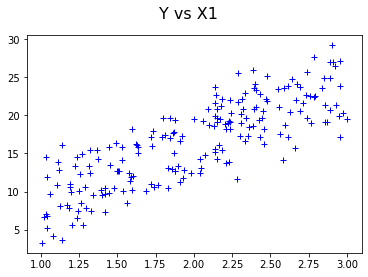

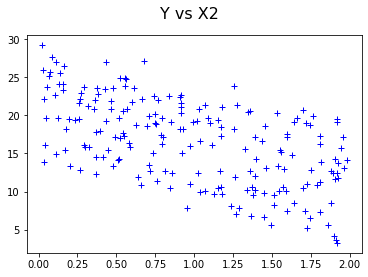

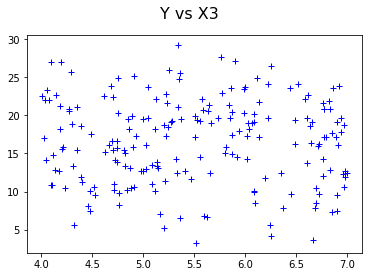

In [4]:
# Plot dataset to chart
plt.plot(X1.squeeze(), Y, 'b+')
plt.suptitle('Y vs X1', fontsize=16)
plt.show()
plt.plot(X2.squeeze(), Y, 'b+')
plt.suptitle('Y vs X2', fontsize=16)
plt.show()
plt.plot(X3.squeeze(), Y, 'b+')
plt.suptitle('Y vs X3', fontsize=16)
plt.show()

## Create an MLR model


In [5]:
# Create an MLR model
mlr_model = LinearRegression()

# Training
mlr_model.fit(X, Y)
print(mlr_model.coef_)
print(mlr_model.intercept_)

# Results
print(f'Source c0 = {b0}\t Model c0 = {mlr_model.intercept_:.2f}\tRelative difference {100*(b0-mlr_model.intercept_)/mlr_model.intercept_:.2f}%')
print(f'Source c1 = {b1}\t Model c1 = {mlr_model.coef_[0]:.2f}\tRelative difference {100*(b1-mlr_model.coef_[0])/mlr_model.coef_[0]:.2f}%')
print(f'Source c2 = {b2}\t Model c2 = {mlr_model.coef_[1]:.2f}\tRelative difference {100*(b2-mlr_model.coef_[1])/mlr_model.coef_[1]:.2f}%')
print(f'Source c3 = {b3}\t Model c3 = {mlr_model.coef_[2]:.2f}\tRelative difference {100*(b3-mlr_model.coef_[2])/mlr_model.coef_[2]:.2f}%')

[ 7.75062675 -5.0427891   0.1358412 ]
5.203549170267774
Source c0 = 5	 Model c0 = 5.20	Relative difference -3.91%
Source c1 = 8	 Model c1 = 7.75	Relative difference 3.22%
Source c2 = -5	 Model c2 = -5.04	Relative difference -0.85%
Source c3 = 0.1	 Model c3 = 0.14	Relative difference -26.38%


## Predictions


In [6]:
# Predictions
new_obs = 100
i = 0
feature_n = np.shape(X)[1]
X_pred = np.empty([new_obs, feature_n])
for feature in [X1, X2, X3]:
    first, last = feature.min(), feature.max()
    X_pred[:, i] = np.linspace(first, last, new_obs)
    i += 1

### Predict


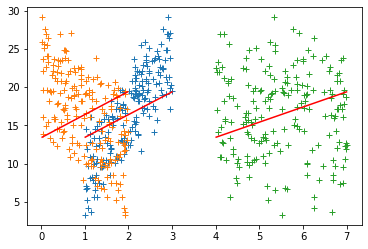

In [7]:
# Predict
Y_pred = mlr_model.predict(X=X_pred)

# Plot predictions to chart
plt.plot(X, Y, '+')
plt.plot(X_pred, Y_pred, 'r-')
plt.show()